In [144]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import numpy as np
import re

# if using a Jupyter notebook, includue:
%matplotlib inline
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer
from TweetNormalizer import normalizeTweet
# tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-large")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)


#https://github.com/pysentimiento/pysentimiento
from pysentimiento import SentimentAnalyzer, EmotionAnalyzer
from pysentimiento.preprocessing import preprocess_tweet

emotion_analyzer = EmotionAnalyzer(lang="en")
analyzer = SentimentAnalyzer(lang="en")



Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/vinai/bertweet-base/resolve/main/config.json from cache at /Users/cj1/.cache/huggingface/transformers/356366feedcea0917e30f7f235e1e062ffc2d28138445d5672a184be756c8686.a2b6026e688d1b19cebc0981d8f3a5b1668eabfda55b2c42049d5eac0bc8cb2d
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tokenizer_class": "BertweetTokenizer",
  "transformers_v

In [145]:
df = pd.read_csv('tweets.csv')  
# df = df.head(50) # Only get top 50 rows
df = df.drop(['id','screen_name' ,'created_at', 'retweeted'], axis=1)


In [146]:
def emotion_analysis(input):
    analysis = emotion_analyzer.predict(input)
    return analysis.output
    
def sentiment_analysis(input):
    analysis = analyzer.predict(input)
    return analysis.output

def strip_user(text):
    return re.sub(r'@user', '', text)

def strip_url(text):
    return re.sub(r'url', '', text)   

# TODO:
def strip_newline(text):
    return text.replace('\r\n', '')      

def preprocess(text):
    ids = tokenizer.encode(text)
    return tokenizer.decode(ids, skip_special_tokens=True)


In [147]:
def return_multiple(input):
    return 1, 2
    
# df['normalized'] = df.apply(lambda row : normalizeTweet(row['text']), axis = 1)
df['normalized'] = df.apply(lambda row : preprocess(row['text']), axis = 1)
df['preprocessed'] = df.apply(lambda row : preprocess_tweet(row['text'], lang="en", user_token="@user"), axis = 1)
df['sentiment'] = df.apply(lambda row : sentiment_analysis(row['preprocessed']), axis = 1)
df['emotion'] = df.apply(lambda row : emotion_analysis(row['preprocessed']), axis = 1)
# df[['A','B']] = df.apply(lambda row : return_multiple(row['text']), axis = 1,  result_type ='expand')
df['stripped'] = df.apply(lambda row : strip_url(row['preprocessed']), axis = 1)
df['stripped'] = df.apply(lambda row : strip_newline(row['stripped']), axis = 1)
# Filter URLS

df = df[df['normalized'] != "HTTPURL"]


In [148]:
#Export
df.to_csv('data/tweets_output.csv')

<AxesSubplot:xlabel='emotion'>

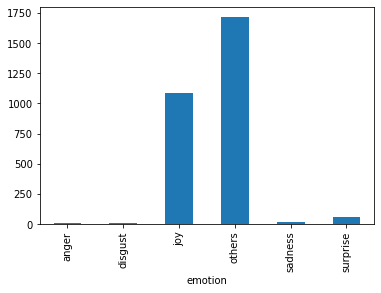

In [149]:
emo_df = df.groupby('emotion').size()
emo_df
emo_df.plot.bar()


<AxesSubplot:xlabel='sentiment'>

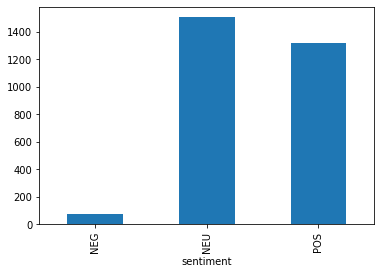

In [150]:
sent_df = df.groupby('sentiment').size()
sent_df
sent_df.plot.bar()



In [151]:



emotion_analyzer.predict("I'm very happy to be here")

EmotionOutput(output=joy, probas={joy: 0.979, others: 0.011, sadness: 0.002, surprise: 0.002, anger: 0.002, fear: 0.002, disgust: 0.001})

In [152]:
result = analyzer.predict("I'm very happy to be here")
result.output
result.probas["NEG"]

0.0018910488579422235

In [153]:
d = dtale.show(df)
# tt = TweetTokenizer()
# tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
# print(tt.tokenize(tweet))
# print(word_tokenize(tweet))

 * Tip: There are .env or .flaskenv files present. Do "pip install python-dotenv" to use them.


Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-10-25 12:05:20,695 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...


2021-10-25 12:05:21,070 - INFO     - Executing shutdown...
/Users/cj1/projects/dj_k_tweets/venv/lib/python3.9/site-packages/dtale/app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.

